# **Séries Temporais**

**Introdução a Séries Temporais**

O que são séries temporais?

Séries temporais são sequências de dados coletados ou registrados em intervalos de tempo igualmente espaçados. Por exemplo:


* Temperatura diária em uma cidade.

* Preço de ações ao longo do tempo.

* Consumo de energia elétrica a cada hora.


Esses dados possuem uma dependência temporal, ou seja, os valores futuros são influenciados pelos valores passados.

Exemplo simples de uma série temporal:

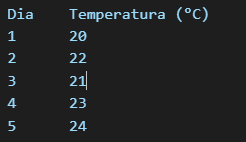



# **Básico: Entendendo os Componentes de Séries Temporais**

Séries temporais podem ser divididas em quatro componentes principais:

1. **Tendência (Trend):** Movimento de longo prazo nos dados.

Por exemplo:
* O aumento do uso de internet ao longo dos anos.
* Um declínio constante na população de uma cidade pequena.

Exemplo visual:
Se você observar o preço de um produto aumentando regularmente por meses, esse aumento é a tendência.


2. **Sazonalidade (Seasonality):** Padrões que se repetem em intervalos regulares de tempo.

Por exemplo:

* Vendas de brinquedos aumentam no Natal.
* Consumo de energia elétrica cresce no verão devido ao uso de ar-condicionado.

Exemplo visual:
Um gráfico das vendas de sorvete ao longo do ano mostra picos no verão.


3. **Ciclo (Cycle):** Movimentos de longo prazo influenciados por fatores econômicos ou sociais, como recessões ou expansões.

4. **Ruído (Noise):** Flutuações aleatórias sem padrão definido.

Exemplo simples:
Imagine medir o batimento cardíaco de uma pessoa durante um dia. Picos inesperados devido a estresse são ruídos.


# **Intermediário: Explorando os Dados**

1. **Visualização Gráfica:** O primeiro passo para entender uma série temporal é criar um gráfico de linha. Isso ajuda a identificar tendências e sazonalidades rapidamente.

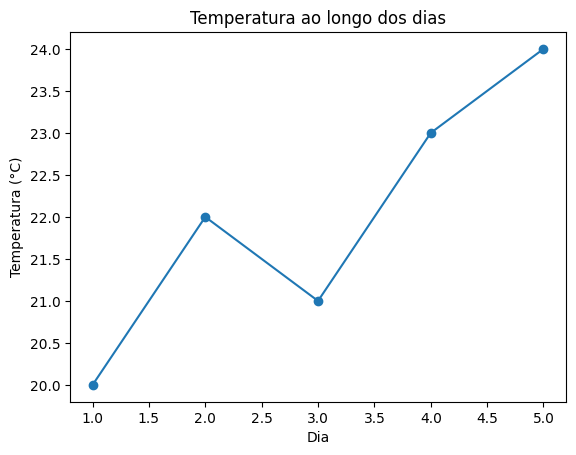

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados fictícios
data = pd.DataFrame({"Dia": [1, 2, 3, 4, 5], "Temperatura": [20, 22, 21, 23, 24]})
plt.plot(data["Dia"], data["Temperatura"], marker='o')
plt.title("Temperatura ao longo dos dias")
plt.xlabel("Dia")
plt.ylabel("Temperatura (°C)")
plt.show()

2. **Decomposição dos Componentes:** É possível separar tendência, sazonalidade e ruído para entender melhor os dados.

**Explicação:**

* Tendência (linha de longo prazo).
* Sazonalidade (padrões que se repetem).
* Ruído (parte imprevisível dos dados).




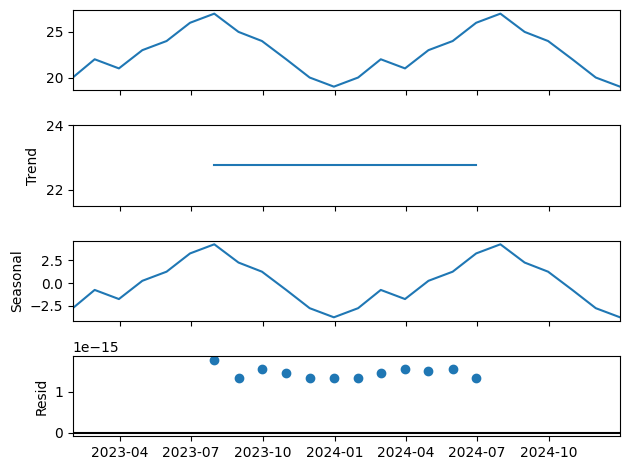

In [49]:
# Bibliotecas Importadas
from statsmodels.tsa.seasonal import seasonal_decompose
# Aqui estamos importando a função seasonal_decompose, que será usada para separar uma série temporal em três partes:
# Tendência (como os dados mudam no longo prazo),
# Sazonalidade (repetição de padrões em intervalos regulares),
# Ruído (variações aleatórias ou imprevisíveis nos dados).

import pandas as pd
# Bem o pandas como é bem conhecido, vamos falar rapidamente:
# biblioteca que ajuda a trabalhar com tabelas de dados e séries temporais.


import matplotlib.pyplot as plt
# uma ferramenta para criar gráficos, que usaremos para visualizar a decomposição.

# Aqui estamos criando Dados "fictícios"
# O que estamos fazendo, o pd.Series(): Vai criar uma série temporal, que é como uma lista organizada de valores com uma data associada a cada um deles.
# Os números representam dados "fictícios", por exemplo, vendas mensais, temperatura ou consumo de energia.
# Por fim, multiplicamos a lista por 2 para criar dois ciclos completos (24 valores no total).

# Agora vamos falar do index= ...
# Aqui definimos as datas associadas a cada número.
# Estamos começando em 1º de janeiro de 2023 (start="2023-01-01").
# Criamos 24 datas (uma para cada valor). (periods=24:).
# Por fim, indicamos que os dados são mensais e representam o último dia de cada mês. (freq="M").
data = pd.Series(
    [20, 22, 21, 23, 24, 26, 27, 25, 24, 22, 20, 19] * 2,
    index=pd.date_range("2023-01-01", periods=24, freq="ME")
)

# Decomposição sazonal
# Essa função divide a série temporal em:
# Tendência: O "caminho geral" dos dados ao longo do tempo (crescendo, decrescendo ou estável).
# Sazonalidade: Padrões que se repetem regularmente (por exemplo, vendas mais altas no verão e mais baixas no inverno).
# Ruído: O que sobra depois de remover a tendência e a sazonalidade, ou seja, as variações aleatórias.

# Estamos passando alguns parâmetros:
# data: A série temporal que criamos.
# model='additive': Assumimos que a série é "aditiva", ou seja, o valor observado é a soma da tendência, da sazonalidade e do ruído.
# period=12: Dizemos que um ciclo completo (sazonalidade) ocorre a cada 12 observações (um ano de dados mensais).
decompose = seasonal_decompose(data, model='additive', period=12)

# Visualização, vamos gerar gráficos para cada uma das partes da decomposição.
# O gráfico original.
# A tendência ao longo do tempo.
# A sazonalidade identificada.
# O ruído (ou resíduo).
decompose.plot()

# Aqui mostramos o gráfico na tela.
plt.show()


**Opções para o parâmetro model do método seasonal_decompose da biblioteca statsmodels**

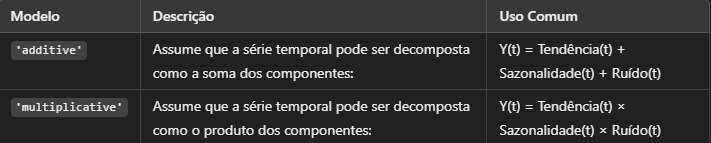

Diferença Entre Modelos

1. Modelo Aditivo ('additive')

Use este modelo quando os componentes da série (tendência, sazonalidade e ruído) não variam proporcionalmente com o nível da série.
Exemplo: A temperatura média mensal que flutua entre 10 e 20 graus ao longo do ano (a variação sazonal é constante).

2. Modelo Multiplicativo ('multiplicative')

Use este modelo quando os componentes da série variam proporcionalmente com o nível da série.
Exemplo: Vendas que aumentam ao longo do tempo, mas a flutuação sazonal (picos e vales) também cresce proporcionalmente às vendas.

obs: Picos - Representam os valores máximos locais ou globais em um intervalo de tempo. Exemplo: O mês com o maior número de vendas em um ano.
Vales - Representam os valores mínimos locais ou globais em um intervalo de tempo. Exemplo: O mês com o menor número de vendas em um ano.

Para escolher o modelo, tente ter em mente.

Aditivo é apropriado quando:
A amplitude da sazonalidade é constante ao longo do tempo.
Os dados têm flutuações uniformes (valores pequenos e grandes não variam tanto).

Multiplicativo é apropriado quando:
A amplitude da sazonalidade aumenta ou diminui proporcionalmente ao nível dos dados.

Os dados têm flutuações maiores em níveis altos e menores em níveis baixos.



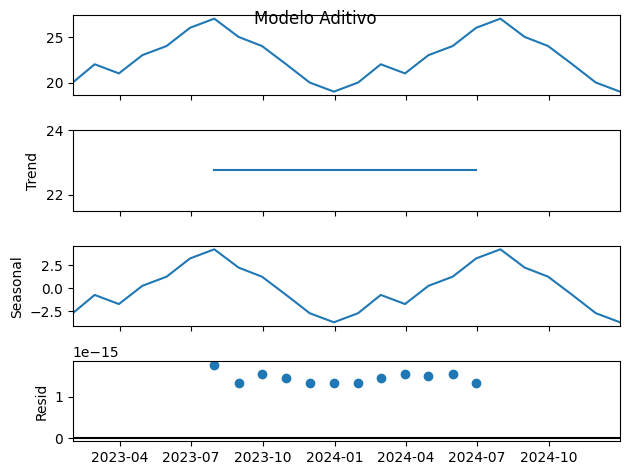

In [50]:
# Decomposição Aditiva
additive_decompose = seasonal_decompose(data, model='additive', period=12)
additive_decompose.plot()
plt.suptitle("Modelo Aditivo")
plt.show()




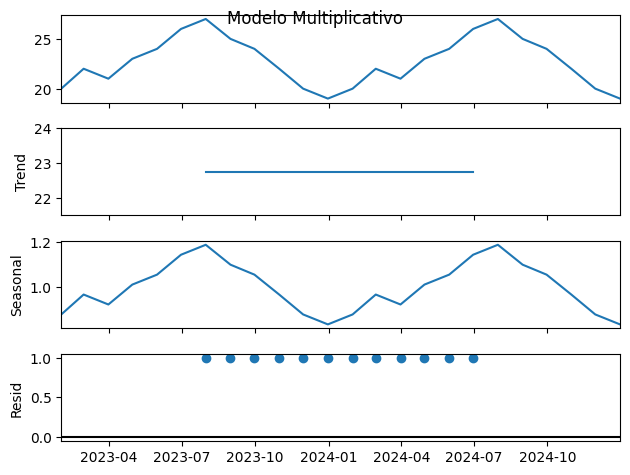

In [51]:
# Decomposição Multiplicativa
multiplicative_decompose = seasonal_decompose(data, model='multiplicative', period=12)
multiplicative_decompose.plot()
plt.suptitle("Modelo Multiplicativo")
plt.show()

Aqui podemos ver resultados e diferenças

**Gráficos do Modelo Aditivo:**
Mostram que os componentes (tendência, sazonalidade e ruído) são independentes do nível dos dados.

**Gráficos do Modelo Multiplicativo:**
Mostram que a sazonalidade e o ruído são proporcionalmente maiores quando o nível da série é alto e menores quando o nível da série é baixo.

3. **Média Móvel:** É usada para suavizar os dados e reduzir o impacto do ruído.

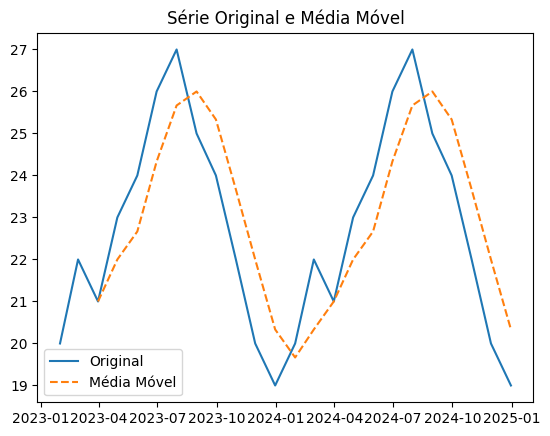

In [52]:
# Vamos converter a série para um DataFrame para suportar múltiplas colunas.
data = pd.DataFrame(data, columns=["Valores"])

# Vamos calcular a média móvel com uma janela de 3 períodos e adicionamos como uma nova coluna no DataFrame.
data["Media_Movel"] = data["Valores"].rolling(window=3).mean()

# Plotar os dados originais e a média móvel
plt.plot(data["Valores"], label="Original")
plt.plot(data["Media_Movel"], label="Média Móvel", linestyle='--')
plt.legend()
plt.title("Série Original e Média Móvel")
plt.show()

# **Avançado: Modelagem e Previsão**

1. **Modelo ARIMA:** ARIMA (AutoRegressive Integrated Moving Average) é um modelo poderoso para previsão de séries temporais.

* AR (AutoRegressive): usa valores passados.
* I (Integrated): torna os dados estacionários (remove tendência).
* MA (Moving Average): modela os erros como uma combinação de erros passados.

Primeiro vamos criar um conjunto de dados fictício com uma série temporal univariada.

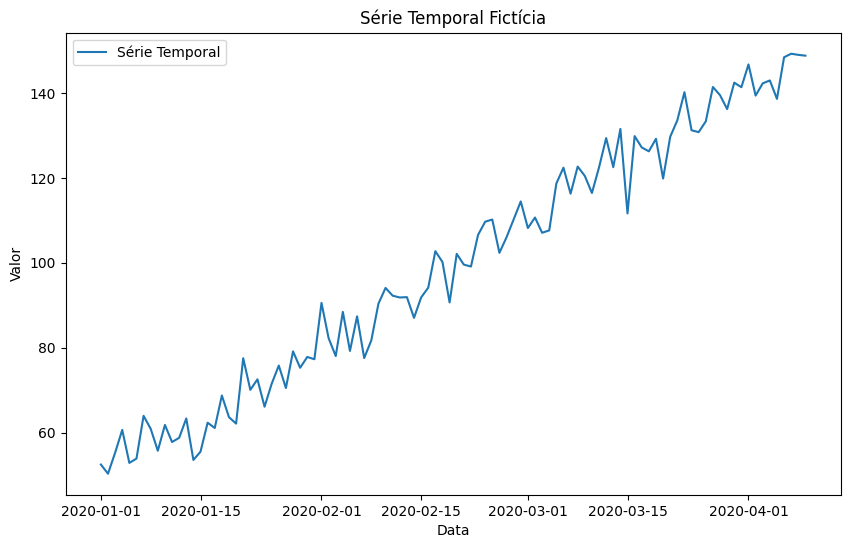

2020-01-01    52.483571
2020-01-02    50.318780
2020-01-03    55.258645
2020-01-04    60.645452
2020-01-05    52.869637
Freq: D, dtype: float64


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aqui vamos gerar dados fictícios para uma série temporal univariada
np.random.seed(42)
n_points = 100
time = pd.date_range(start='2020-01-01', periods=n_points, freq='D')

# Agora vamos gerar uma tendência linear com ruído
trend = np.linspace(50, 150, n_points)
noise = np.random.normal(loc=0, scale=5, size=n_points)

# Agora vamos criar nossa série temporal univariada

data = pd.Series(trend + noise, index=time)

# E por fim vamos plotar a série temporal
plt.figure(figsize=(10, 6))
plt.plot(data, label='Série Temporal')
plt.title('Série Temporal Fictícia')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()


print(data.head())


Neste exemplo, geramos uma série temporal com uma tendência linear (valores que aumentam ao longo do tempo) e adicionamos ruído aleatório (ruído normal com desvio padrão de 5). Esse conjunto de dados é univariado e pode ser usado com o modelo ARIMA.

In [54]:
from statsmodels.tsa.arima.model import ARIMA

# Vamos criar o modelo ARIMAR, porém vamos entender algumas coisas antes:
# O modelo ARIMA é usado para prever séries temporais com base em três componentes:
# AR (Auto-Regressivo): Como os dados passados influenciam os dados futuros.
# I (Integração): Diferença entre os dados para torná-los mais "estacionários" (sem tendência).
# MA (Média Móvel): Como os erros passados afetam os dados futuros.

# Nesse caso, o modelo ARIMA que usamos tem:
# 1 para AR (um valor passado de dados influencia o valor atual),
# 1 para I (uma diferença é feita para eliminar tendências),
# 1 para MA (um erro passado influencia o valor atual).
model = ARIMA(data, order=(1, 1, 1))
fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -311.369
Date:                Fri, 10 Jan 2025   AIC                            628.737
Time:                        19:14:39   BIC                            636.523
Sample:                    01-01-2020   HQIC                           631.887
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1260      0.200     -0.630      0.529      -0.518       0.266
ma.L1         -0.4684      0.193     -2.423      0.015      -0.847      -0.090
sigma2        31.4554      4.664      6.744      0.0

UM RESUMO SOBRE OS RESULTADOS

**Coeficientes:**

ar.L1: O coeficiente de -0.1260 significa que a série temporal tem uma leve influência negativa dos dados passados (mas essa relação não é muito forte, já que o valor de p é alto — 0.529).

ma.L1: O coeficiente de -0.4684 mostra que a média móvel tem uma influência negativa mais forte. Isso significa que o erro do modelo passado afeta consideravelmente a previsão. Como o valor de p é 0.015 (menor que 0.05), podemos dizer que essa relação é significativa.

sigma2: O valor de 31.4554 é a variância do erro do modelo, ou seja, quanto o modelo está "errando" nas previsões. Um valor maior indica maior incerteza nas previsões.

**Testes Estatísticos:**

Ljung-Box (Q): Esse teste verifica se existem padrões nos resíduos (erros) do modelo. O valor de 3.00 indica que os resíduos são relativamente independentes, e o valor de Prob(Q) de 0.08 sugere que não há evidência forte de padrões nos erros.

Jarque-Bera (JB): Testa a normalidade dos resíduos. O valor de 0.72 e o valor de p de 0.70 indicam que os resíduos seguem uma distribuição normal, o que é bom para o modelo.

**AIC, BIC, HQIC:**

AIC (628.737) e BIC (636.523) são indicadores que ajudam a comparar a qualidade do modelo. Valores mais baixos indicam um modelo melhor, mas é necessário comparar com outros modelos para ver se esse é realmente o melhor.

HQIC (631.887) é outro indicador semelhante ao AIC e BIC.

Observando isso podemos concluír:

O modelo ARIMA foi capaz de capturar algumas relações nos dados, mas a influência dos dados passados não é muito forte (com exceção da parte de média móvel, que tem uma influência significativa).



2. **Previsão com ARIMA:** Depois de treinar o modelo, é possível prever valores futuros.

In [55]:
forecast = fit.forecast(steps=5)
print("Previsão:", forecast)

Previsão: 2020-04-10    148.416533
2020-04-11    148.468251
2020-04-12    148.461736
2020-04-13    148.462557
2020-04-14    148.462453
Freq: D, Name: predicted_mean, dtype: float64


Aqui o modelo ARIMA fez a previsão para os dias seguintes ao último dia disponível no conjunto de dados, que é 9 de abril de 2020. Os resultados para os próximos 5 dias.

Esses são os resultados para os próximos 5 dias:

2020-04-11    148.468251

2020-04-12    148.461736

2020-04-13    148.462557

2020-04-14    148.462453


O que isso significa?
O modelo está prevendo que, nos próximos 5 dias, os valores da série temporal (os dados que estamos analisando) vão ficar próximos de 148.46, com pequenas variações entre os dias.

Esses valores são as estimativas do modelo com base nas tendências e padrões que ele identificou nos dados anteriores. O modelo está dizendo que, após o dia 9 de abril de 2020, a série temporal continuará com uma tendência estável, com valores em torno de 148, com pequenas flutuações.


Em outras palavras, o modelo ARIMA prevê que os valores nos próximos 5 dias vão se manter quase constantes, ligeiramente em torno de 148, sem grandes mudanças. Isso pode ser útil para identificar uma tendência futura, mas lembre-se que o modelo baseia-se no que aprendeu dos dados passados, então ele pode não capturar eventos inesperados ou mudanças abruptas.






3. **Modelo Prophet:** O Prophet é uma ferramenta desenvolvida pelo Facebook para previsão intuitiva de séries temporais.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd36azza/_s8ug5t5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnd36azza/brcmis4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9844', 'data', 'file=/tmp/tmpnd36azza/_s8ug5t5.json', 'init=/tmp/tmpnd36azza/brcmis4x.json', 'output', 'file=/tmp/tmpnd36azza/prophet_modeln3ms3hwk/prophet_model-20250110194613.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:46:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:46:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, 

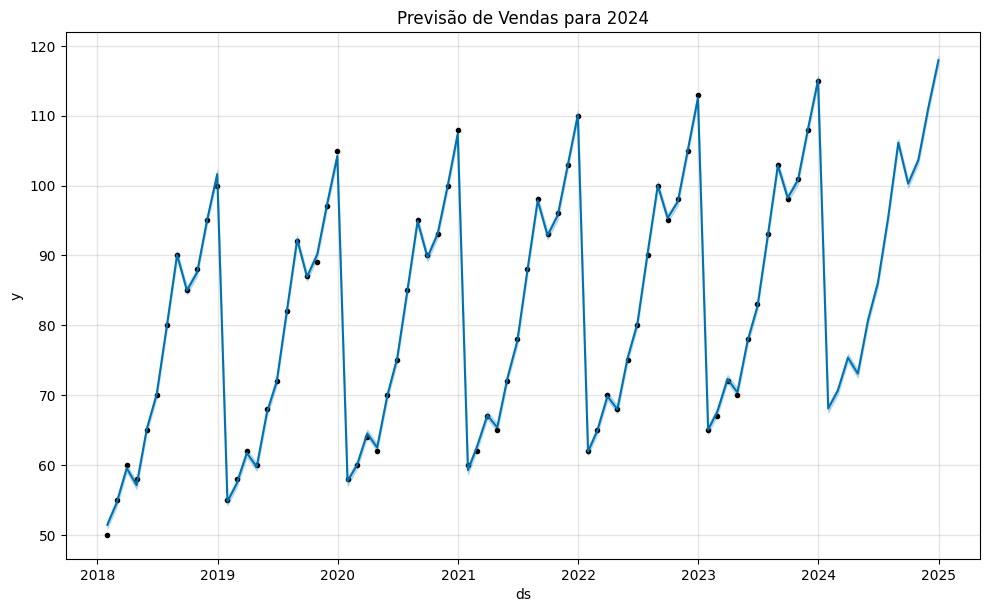

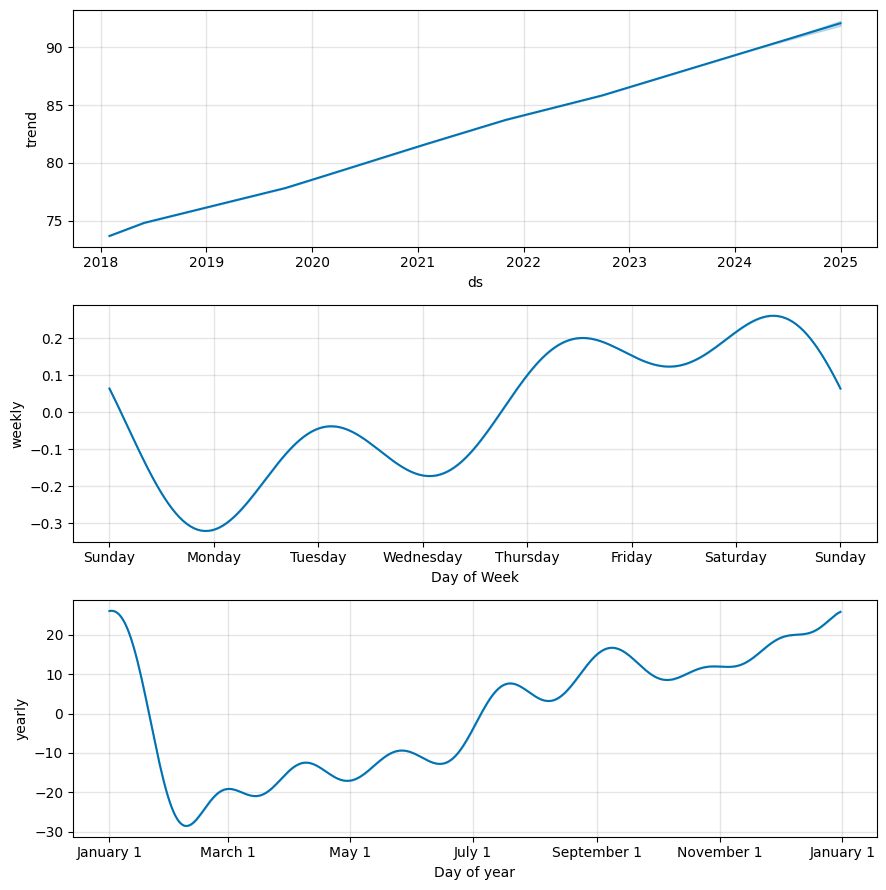

In [81]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Aqui estamos criando dados de vendas mensais de janeiro de 2018 a dezembro de 2023
# Com uma variação cíclica (valores de vendas mais altos durante as festas de final de ano)
data = pd.DataFrame({
    "ds": pd.date_range("2018-01-01", periods=72, freq="ME"),  # 6 anos de dados mensais
    "y": [50, 55, 60, 58, 65, 70, 80, 90, 85, 88, 95, 100,  # 2018
          55, 58, 62, 60, 68, 72, 82, 92, 87, 89, 97, 105,  # 2019
          58, 60, 64, 62, 70, 75, 85, 95, 90, 93, 100, 108, # 2020
          60, 62, 67, 65, 72, 78, 88, 98, 93, 96, 103, 110, # 2021
          62, 65, 70, 68, 75, 80, 90, 100, 95, 98, 105, 113, # 2022
          65, 67, 72, 70, 78, 83, 93, 103, 98, 101, 108, 115] # 2023
})

# Criando o modelo Prophet
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)

# Aqui estamos treinando o modelo com os dados de vendas
model.fit(data)

# Vamos fazer a  previsão para os próximos 12 meses (de janeiro a dezembro de 2024)
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)

# Plotando os resultados da previsão
fig1 = model.plot(forecast)
plt.title('Previsão de Vendas para 2024')
plt.show()

# Plotando os componentes da previsão, como a tendência e a sazonalidade
fig2 = model.plot_components(forecast)
plt.show()



In [83]:
# Analisando os componentes de sazonalidade
print("Componentes de sazonalidade e tendência:")
print("Tendência (como os valores aumentam ou diminuem ao longo do tempo):")
print(forecast[['ds', 'trend']].tail(10))  # Mostrando os últimos 10 valores da tendência

# Verificando as colunas de sazonalidade
print("\nVerificando as colunas de sazonalidade:")
print(forecast.columns)

# Agora podemos acessar as colunas de sazonalidade
if 'yearly' in forecast.columns:
    print("\nSazonalidade anual (como os valores variam ao longo do ano):")
    print(forecast[['ds', 'yearly']].tail(10))  # Mostrando os últimos 10 valores da sazonalidade anual

if 'weekly' in forecast.columns:
    print("\nSazonalidade semanal (como os valores variam ao longo da semana):")
    print(forecast[['ds', 'weekly']].tail(10))  # Mostrando os últimos 10 valores da sazonalidade semanal


Componentes de sazonalidade e tendência:
Tendência (como os valores aumentam ou diminuem ao longo do tempo):
           ds      trend
74 2024-03-31  89.979344
75 2024-04-30  90.206508
76 2024-05-31  90.441243
77 2024-06-30  90.668407
78 2024-07-31  90.903142
79 2024-08-31  91.137878
80 2024-09-30  91.365041
81 2024-10-31  91.599777
82 2024-11-30  91.826940
83 2024-12-31  92.061676

Verificando as colunas de sazonalidade:
Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

Sazonalidade anual (como os valores variam ao longo do ano):
           ds     yearly
74 2024-03-31 -14.689553
75 2024-04-30 -17.099189
76 2024-05-31  -9.859909
77 2024-06-30  -4.650768
78 2024-07-31  

**Resultado final:**

**Tendência (como os valores aumentam ou diminuem ao longo do tempo):**

A tendência mostra a direção geral dos valores ao longo do tempo. Nesse caso, as vendas estão sempre aumentando, o que significa que o modelo percebe que, em geral, as vendas vão subindo mês após mês, mesmo com algumas variações. Por exemplo, o valor de 92.06 em dezembro de 2024 mostra que as vendas, de modo geral, estão mais altas no final do ano. O aumento contínuo ao longo do ano é um padrão normal de crescimento que o modelo identificou.

**Sazonalidade Anual (como os valores variam ao longo do ano):**

A sazonalidade anual mostra como as vendas mudam a cada mês ao longo do ano, com base no histórico de dados. Ela captura padrões de vendas que ocorrem durante certas épocas do ano. Por exemplo:

Em março e abril de 2024, as vendas estão abaixo da média (-14.69 e -17.10, respectivamente), indicando que, nesses meses, as vendas tendem a ser mais baixas.

Já em novembro e dezembro, as vendas aumentam muito (19.02 e 25.91, respectivamente), o que é típico para muitos negócios, já que as vendas costumam ser mais altas durante as festas de fim de ano.

Esses valores indicam a diferença entre a tendência geral e o comportamento de vendas de cada mês, considerando um ano típico.

**Sazonalidade Semanal (como os valores variam ao longo da semana):**

A sazonalidade semanal mostra as flutuações nas vendas durante cada semana dentro de um mês. Ou seja, ela mostra se, em média, há semanas com vendas mais altas ou mais baixas. Nesse caso:

Em agosto de 2024, a sazonalidade semanal tem um valor positivo (0.22), o que significa que, em média, as vendas nessa semana estão um pouco mais altas do que a média geral do mês.

Já em setembro, a sazonalidade semanal tem um valor negativo (-0.32), o que indica que, nesse mês, as vendas na semana estão um pouco abaixo da média geral do mês.


**Resumo:**

Tendência: As vendas estão subindo com o tempo, sem grandes quedas, o que é bom para o crescimento do negócio.

Sazonalidade Anual: As vendas aumentam durante os meses de festas (como novembro e dezembro) e diminuem um pouco nos meses de início de ano, como março e abril.

Sazonalidade Semanal: As vendas variam ao longo das semanas dentro de um mês, mas essas flutuações não são tão significativas quanto as variações anuais.


Bem, tudo isso ajuda a entender como os padrões de vendas se comportam ao longo do tempo, tanto ao longo dos meses (sazonalidade anual) quanto das semanas (sazonalidade semanal), e a tendência geral (se está crescendo ou diminuindo). Com essas informações, você pode planejar melhor suas estratégias de vendas e marketing!





**Exemplos de Uso Real**
1. **Previsão de Vendas:** Uma loja online pode usar séries temporais para prever a demanda de produtos durante feriados.
2. **Análise de Tráfego Web:** Empresas podem identificar horários de pico para otimizar servidores.
3. **Saúde:** Monitoramento de sinais vitais de pacientes ao longo do tempo.
4. **Clima:** Modelos meteorológicos utilizam séries temporais para prever temperaturas e chuvas.

**Obs:** Séries temporais são uma ferramenta essencial em várias áreas, como negócios, saúde e economia. Entender os componentes básicos, explorar os dados e aplicar modelos avançados permite extrair insights valiosos e fazer previsões precisas.